# Installs

In [62]:
#if you get an error bellow, it usually means you have
# to install the library first

#You can comment this out as soon as it is installed
#!pip install --upgrade pip
#!pip install seaborn


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
  Using cached seaborn-0.12.1-py3-none-any.whl (288 kB)


# Imports

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns
%matplotlib inline

# Recommended repos

https://github.com/matplotlib/matplotlib/tree/main/tutorials

In [ ]:
https://github.com/mwaskom/seaborn/tree/master/examples

# Loading a dataset


In [91]:
from sklearn.datasets import load_boston

In [93]:
boston_real_state_data = load_boston()

/home/callysthenes/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Cali

In [99]:
#Always preview first to get a first idea of what the df looks like
boston_real_state_data


{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [100]:
#looks like an array
type(boston_real_state_data)

sklearn.utils.Bunch

# Defining axis

In [101]:
# creating a new variable for x and y axis
# we will be calling these later when plotting
x_axis = boston_real_state_data.data
y_axis = boston_real_state_data.target

# Plotting histograms matplotlib

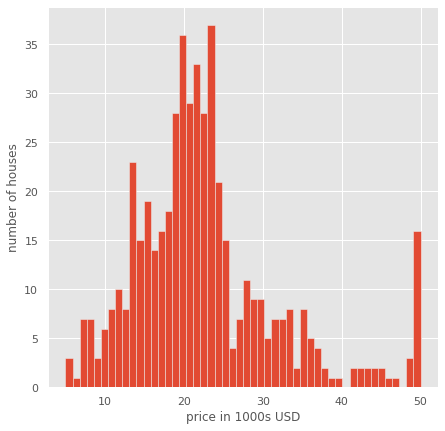

In [111]:
style.use('ggplot')
plt.figure(figsize=(7,7))
plt.hist(y_axis,bins=50)
plt.xlabel("price in 1000s USD")
plt.ylabel("number of houses")
plt.show()

# Scatter plots matplotlib

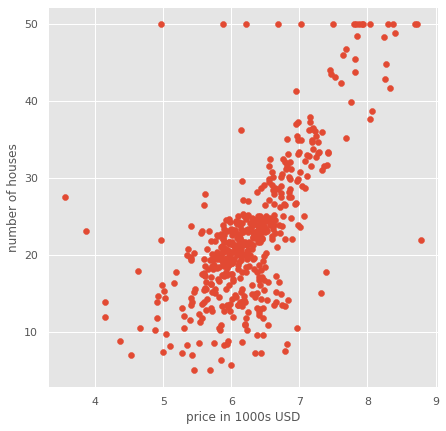

In [114]:
style.use('ggplot')
plt.figure(figsize=(7,7))
plt.scatter(boston_real_state_data.data[:,5], boston_real_state_data.target)
plt.xlabel("price in 1000s USD")
plt.ylabel("number of houses")
plt.show()

# Barplots in Seaborn

In [118]:
#solving ssl error when importing predefined dataset
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [120]:
#setting visuals
sns.set_theme(style="whitegrid")

#loading predefined dataset
penguins = sns.load_dataset("penguins")

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


We are using seaborn's catplot

To fully understand all parameters, read documentation for this type of chart

https://seaborn.pydata.org/generated/seaborn.catplot.html

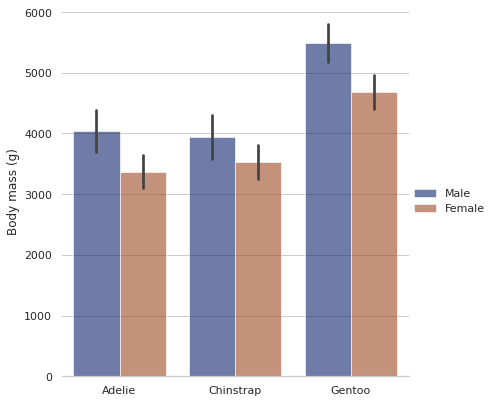

In [121]:
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

In [125]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [133]:
penguins.value_counts('species')

species
Adelie       152
Gentoo       124
Chinstrap     68
dtype: int64

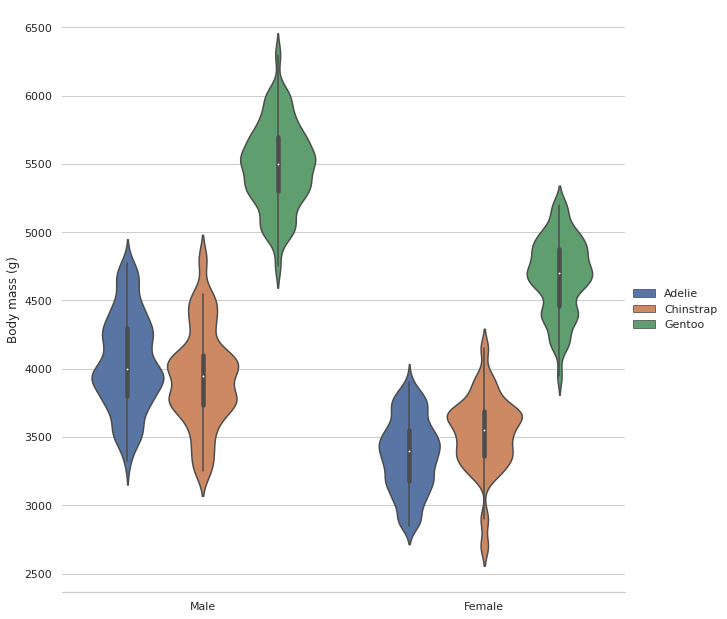

In [148]:
#making a subset using different values
h = sns.catplot(
    data=penguins, kind="violin", bw=.25,
    x="sex", y="body_mass_g", hue="species",
    errorbar="sd", palette="deep", alpha=.8, height=9
    )
h.despine(left=True)
h.set_axis_labels("", "Body mass (g)")
h.legend.set_title("")

# Lineplots with seaborn


In [142]:
# loading dataset
data = sns.load_dataset("iris")
 
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

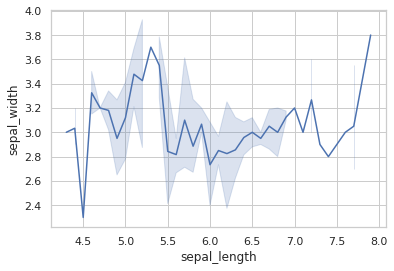

In [143]:
# draw lineplot
sns.lineplot(x="sepal_length", y="sepal_width", data=data)

# Timeseries Seaborn


In [166]:
sns.set_theme(style="dark")
flights = sns.load_dataset("flights")

flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


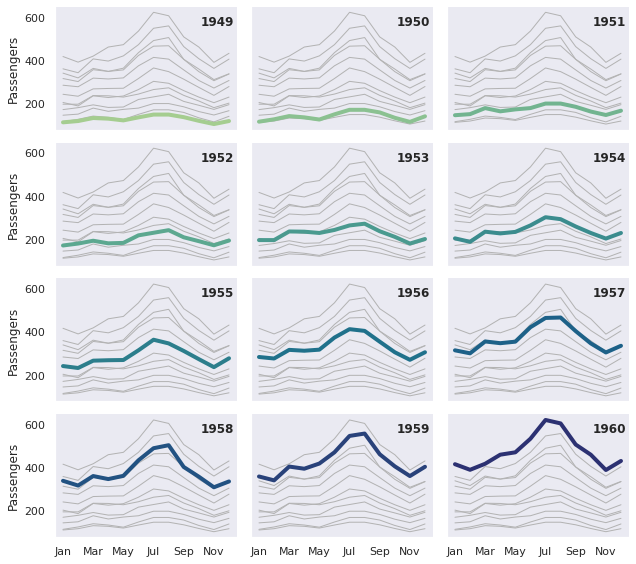

In [167]:
# Plot each year's time series in its own facet
g = sns.relplot(
    data=flights,
    x="month", y="passengers", col="year", hue="year",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=flights, x="month", y="passengers", units="year",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "Passengers")
g.tight_layout()

# Multiple bivariate KDE plots

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
iris = sns.load_dataset("iris")
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

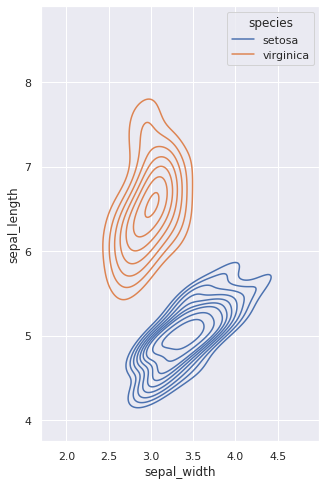

In [173]:

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw a contour plot to represent each bivariate density
sns.kdeplot(
    data=iris.query("species != 'versicolor'"),
    x="sepal_width",
    y="sepal_length",
    hue="species",
    thresh=.2
)

# ECDF plots

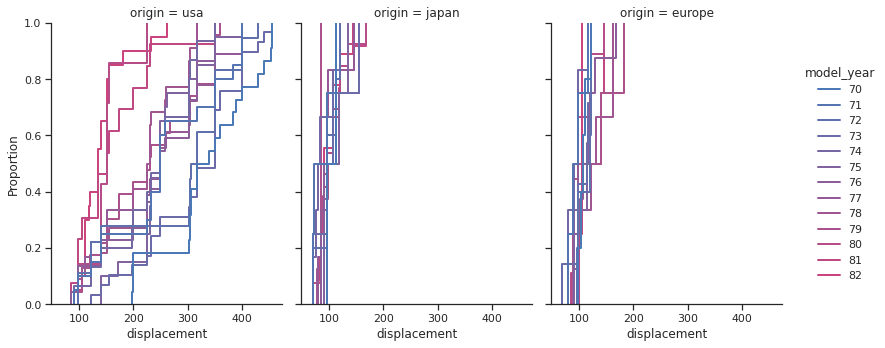

In [174]:
sns.set_theme(style="ticks")
mpg = sns.load_dataset("mpg")

colors = (250, 70, 50), (350, 70, 50)
cmap = sns.blend_palette(colors, input="husl", as_cmap=True)
sns.displot(
    mpg,
    x="displacement", col="origin", hue="model_year",
    kind="ecdf", aspect=.75, linewidth=2, palette=cmap,
)

# HeatScatter in Seaborn

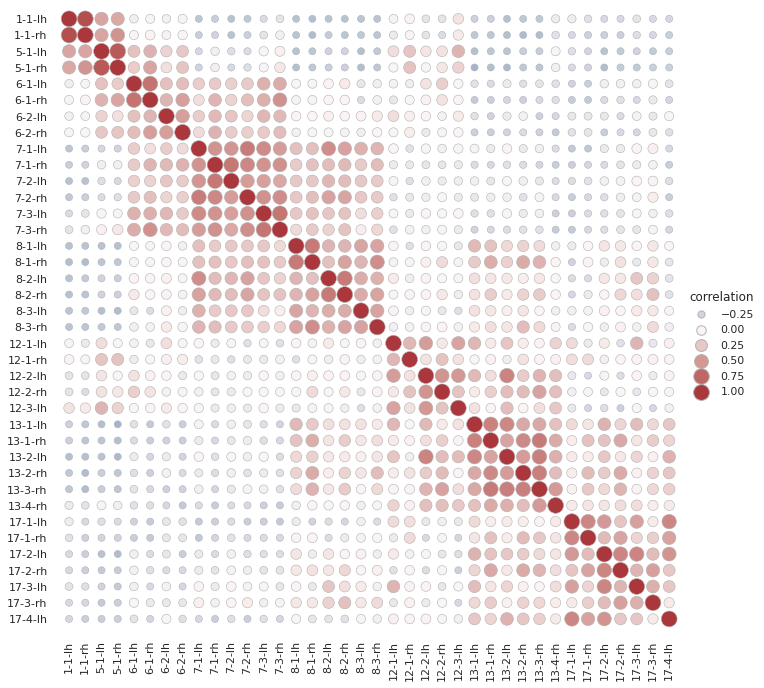

In [163]:
# Load the brain networks dataset, select subset, and collapse the multi-index
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns
                  .get_level_values("network")
                  .astype(int)
                  .isin(used_networks))
df = df.loc[:, used_columns]

df.columns = df.columns.map("-".join)

# Compute a correlation matrix and convert to long-form
corr_mat = df.corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

# Analyzing full dataset in one go

In [149]:
pokemon = pd.read_csv("../Pokemon.csv")

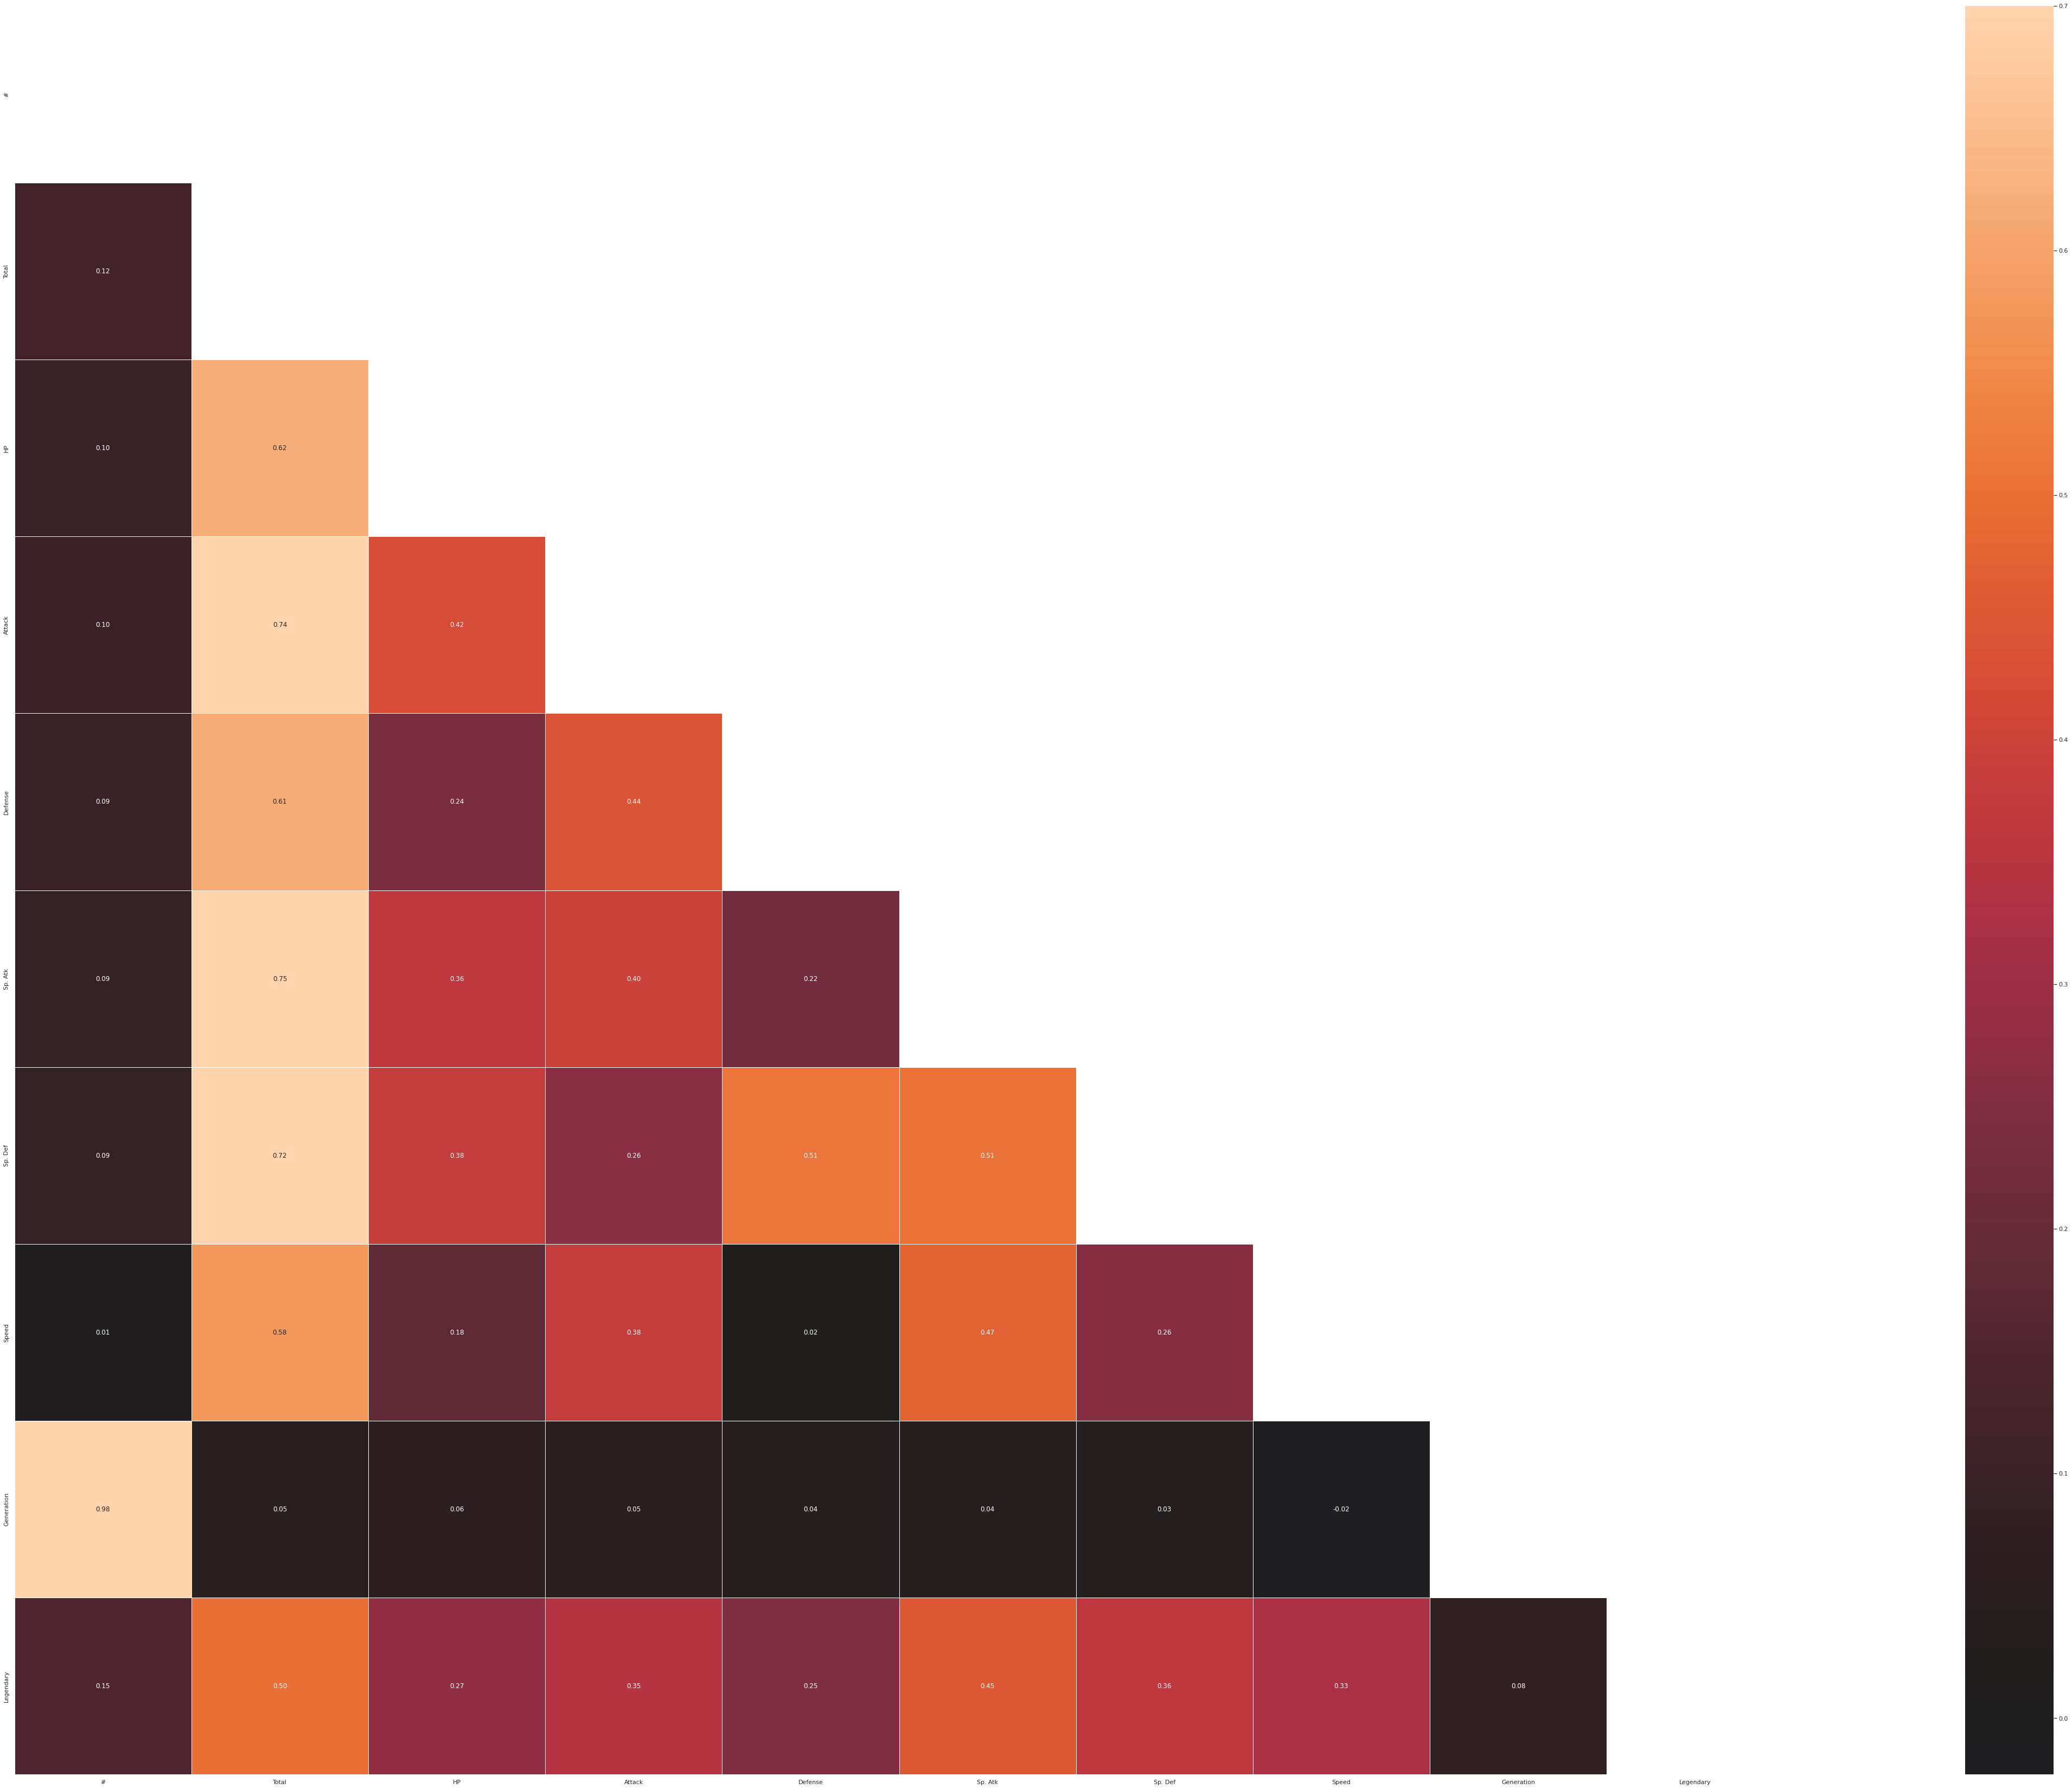

In [150]:
#Heatmap 
matrix = pokemon.corr()
mask = np.zeros_like(matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(120,60))
heatmap = sns.heatmap(matrix, center=0, fmt=".2f", 
                      square=True, annot=True, 
                      linewidth=.9, mask = mask,vmax=.7);
plt.show()

In [151]:
pokemon.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [153]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


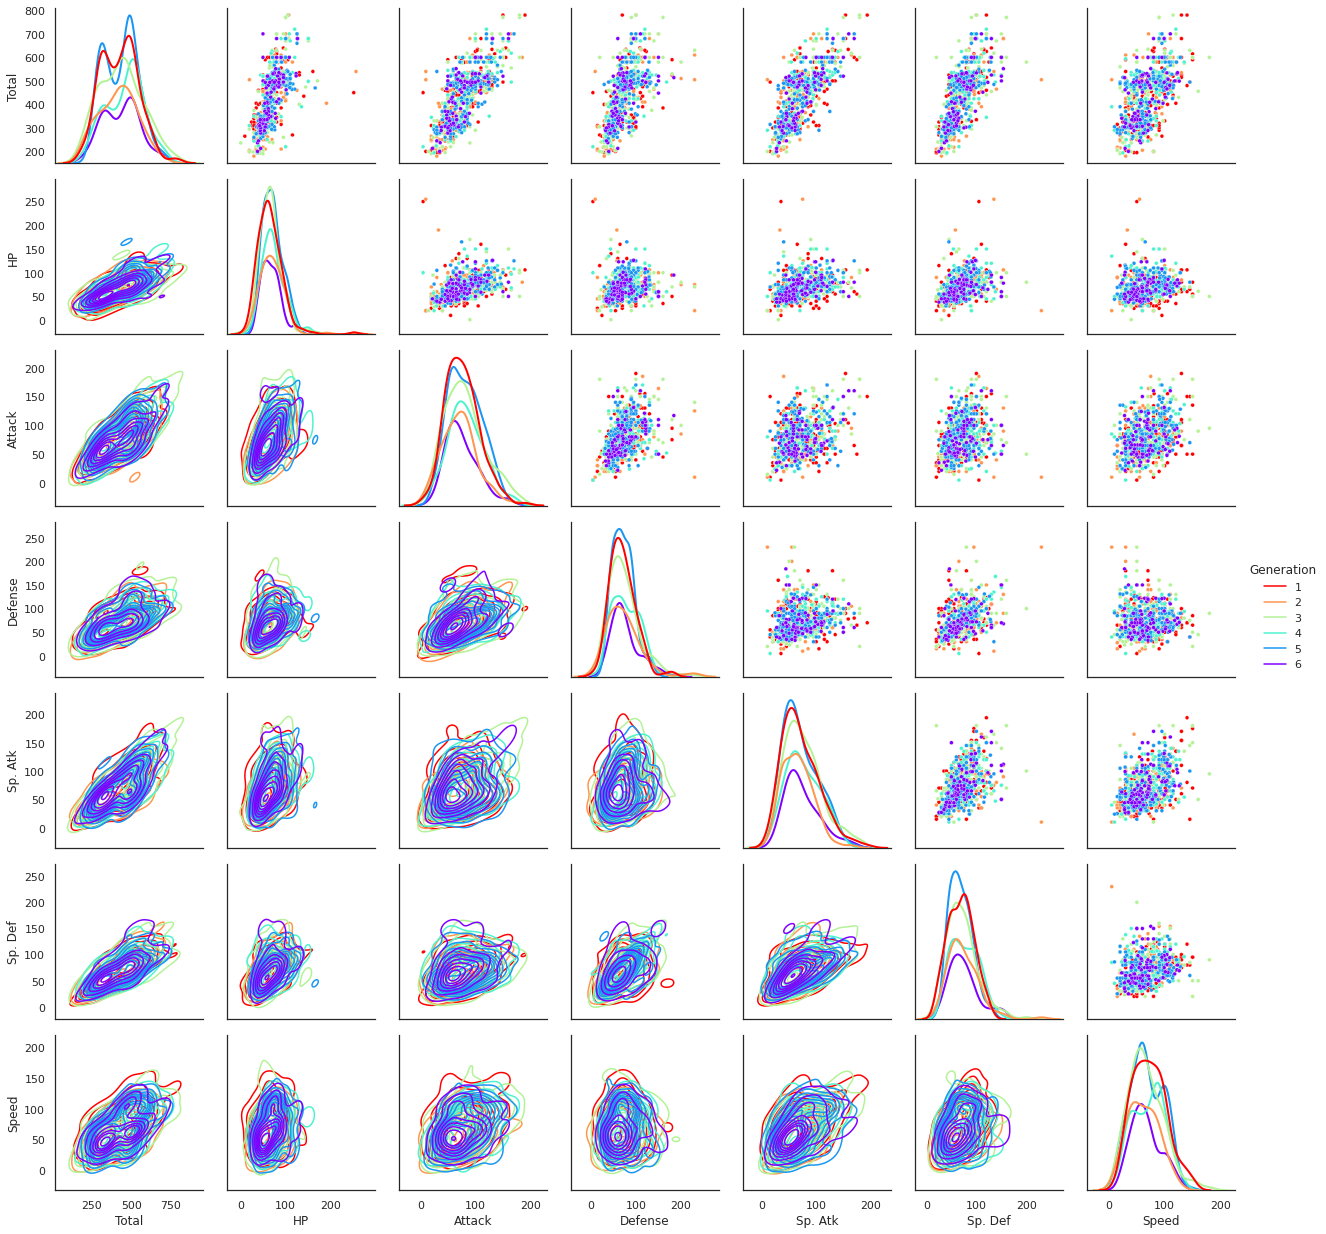

In [154]:
sns.set_theme(style="white")

g = sns.PairGrid(pokemon, vars = ['Total', 'HP', 'Attack', 
                                  'Defense','Sp. Atk', 
                                  'Sp. Def', 'Speed'],
                                  hue='Generation', 
                                  diag_sharey=False, palette = 'rainbow_r')
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot,warn_singular=False)
g.map_diag(sns.kdeplot, lw=2,warn_singular=False)
g.add_legend()

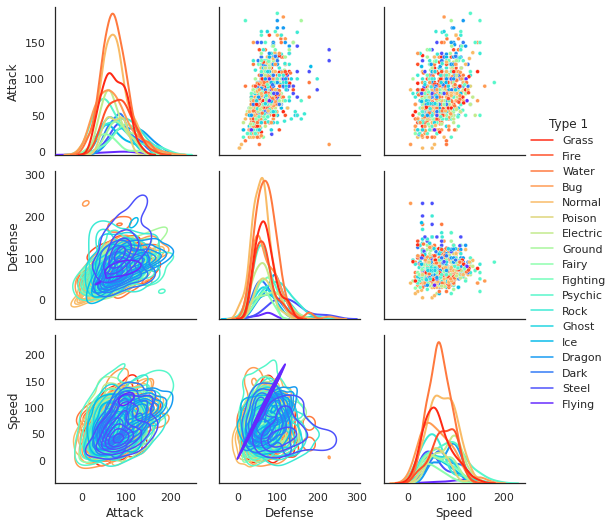

In [158]:
sns.set_theme(style="white")

g = sns.PairGrid(pokemon, vars = ['Attack', 'Defense', 
                                     'Speed'],
                                     hue='Type 1', 
                                     diag_sharey=False, palette = 'rainbow_r')
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot,warn_singular=False)
g.map_diag(sns.kdeplot, lw=2,warn_singular=False)
g.add_legend()

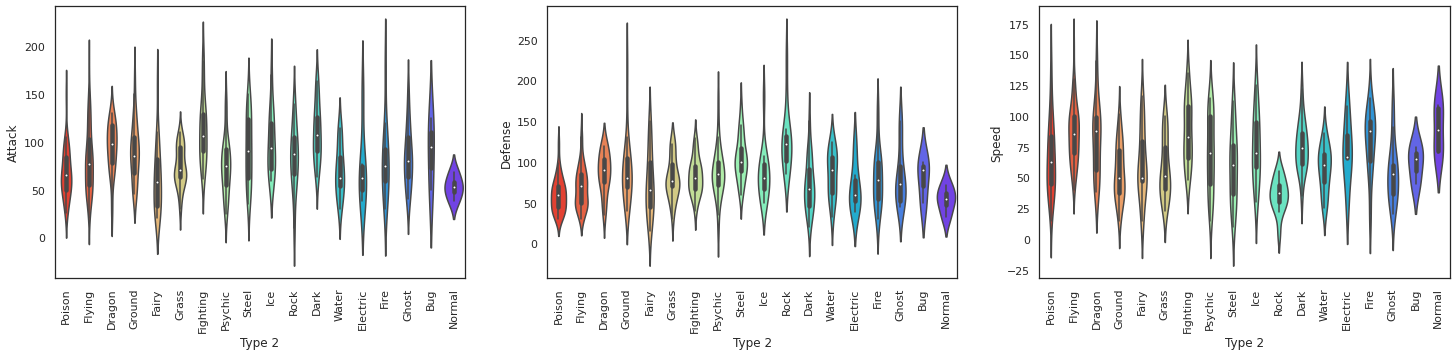

In [162]:
vars= ['Attack', 'Defense', 'Speed']
fig, axs = plt.subplots(1, len(vars), figsize=(25,5))
for i in range(0,len(vars)):
    sns.violinplot( y=pokemon[vars[i]],x=pokemon['Type 2'],
                   data=pokemon,ax=axs[i],palette = 'rainbow_r')
    for tick in axs[i].get_xticklabels():
        tick.set_rotation(90)

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


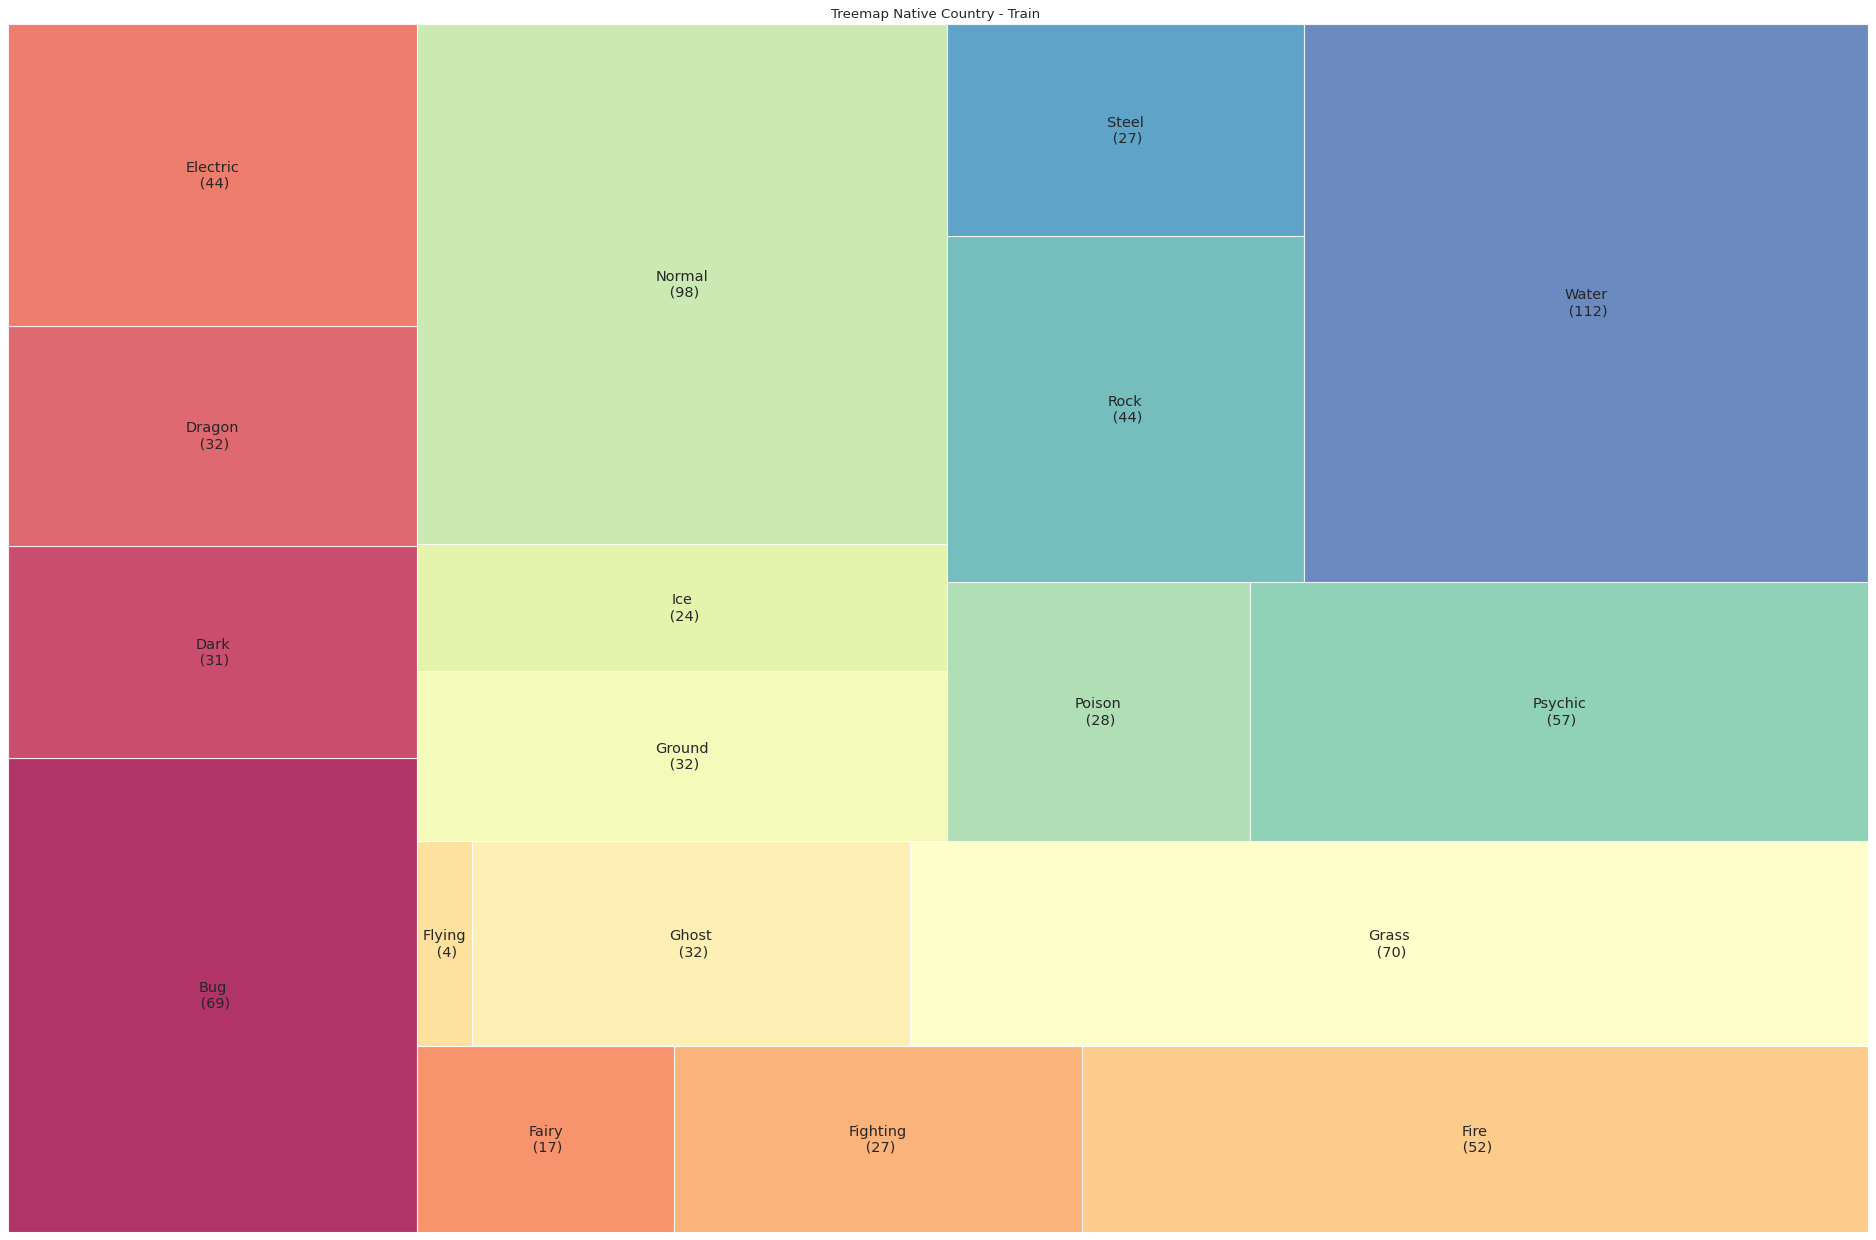

In [161]:
#!pip install squarify
import squarify
#Treemap graph

df = pokemon.groupby('Type 1').size().reset_index(name='counts')
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(30,20), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8,text_kwargs={'fontsize':13})

# Decorate
plt.title('Treemap Native Country - Train ')
plt.axis('off')
plt.show()

In [86]:
df=  pd.read_csv("precipitation.csv")

In [87]:
df.head()

,state,date,precipitation
0,BA,31/01/1998,63.6
1,BA,28/02/1998,55.6
2,BA,31/03/1998,117.2
3,BA,30/04/1998,206.0
4,BA,31/05/1998,250.9


In [65]:
df2 = df.iloc[:,1:3]

In [66]:
df2

,Name,Type 1
0,Bulbasaur,Grass
1,Ivysaur,Grass
2,Venusaur,Grass
3,VenusaurMega Venusaur,Grass
4,Charmander,Fire
...,...,...
795,Diancie,Rock
796,DiancieMega Diancie,Rock
797,HoopaHoopa Confined,Psychic
798,HoopaHoopa Unbound,Psychic


<bound method Axes.bar_label of <AxesSubplot:xlabel='Type 1', ylabel='count'>>

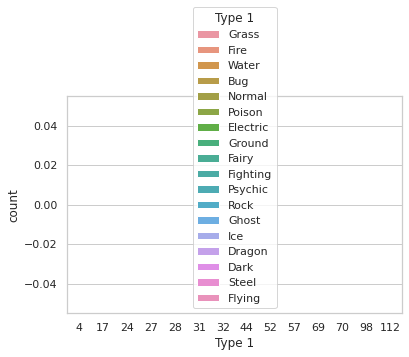

In [85]:
##most common types overall visualized
sns.set_theme(style="whitegrid",)
ctypes = sns.countplot(data=df2, x= df2['Type 1'].value_counts(), hue="Type 1")
ctypes.bar_label

In [68]:
#defining style, search style.use for other styles in doc
style.use('dark_background')

fig,axs = plt.

plt.bar(df2["Type 1"])

plt.xlabel('types')
plt.ylabel("qty")
plt.title("Pokemon types - type1")

SyntaxError: invalid syntax (<ipython-input-68-52c5ba840721>, line 4)